# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.to_csv("combined_mouse_metadata_and_study_results")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [164]:
# Checking the number of mice.
num_mice = len(combined_df["Mouse ID"].unique())
num_mice

249

In [165]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
## found code by searching on Google. This will identify rows with duplicates of both Mouse ID and Timepoint.
duplicates = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicates)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [166]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [167]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id_to_drop = "g989"
data_no_duplicate = combined_df[combined_df["Mouse ID"] != mouse_id_to_drop]
data_no_duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [168]:
# Checking the number of mice in the clean DataFrame.
mouse_count_no_dups = len(data_no_duplicate["Mouse ID"].unique())
mouse_count_no_dups

248

## Summary Statistics

In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs = data_no_duplicate["Drug Regimen"]

tumor_mean = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).mean()
tumor_median = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).median()
tumor_var = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).var()
tumor_std = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).std()
tumor_sem = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).sem()
tumor_count = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).count()

summary_data = {"Mean Tumor Volume":tumor_mean, "Median Tumor Volume":tumor_median, "Tumor Volume Variance":tumor_var,
                                    "Tumor Volume Std. Dev.":tumor_std, "Tumor Volume Std. Err.":tumor_sem, "Tumor Count Per Drug":tumor_count}

summary_df = pd.DataFrame(summary_data)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.,Tumor Count Per Drug
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [170]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

drugs = data_no_duplicate["Drug Regimen"]

# Specify the aggregation functions you want to apply
calculations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem", "count"]}

# Use the aggregate method to apply the specified aggregation functions
summary_df = data_no_duplicate.groupby(data_no_duplicate["Drug Regimen"]).agg(calculations)
summary_df

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                    
             count  
Drug Regimen        
Capomulin      230  
Ceftamin       178  
Infubinol      178  
Ketapril       188  
Naftisol       186  
Placebo        181  
Propriva       148  
Ramicane       228  
Stelasyn       181  
Zoniferol      182

## Bar and Pie Charts

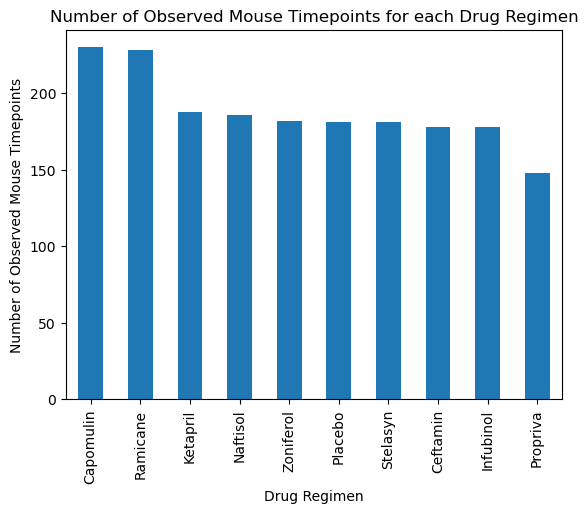

In [171]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#mouse_count_drug = data_no_duplicate["Mouse ID"].groupby(drugs).count()
# data_no_duplicate = data_no_duplicate.set_index("Drug Regimen")
# data_no_duplicate
summary_df = summary_df.reset_index()

# Sort the DataFrame by the count column in descending order
summary_df = summary_df.sort_values(by=("Tumor Volume (mm3)", "count"), ascending=False)

summary_df.plot(kind= "bar", x="Drug Regimen", y=("Tumor Volume (mm3)", "count"), title = "Number of Observed Mouse Timepoints for each Drug Regimen",
                   xlabel = "Drug Regimen", ylabel = "Number of Observed Mouse Timepoints", label="Number of Observed Mouse Timepoints", legend=False)


plt.show()

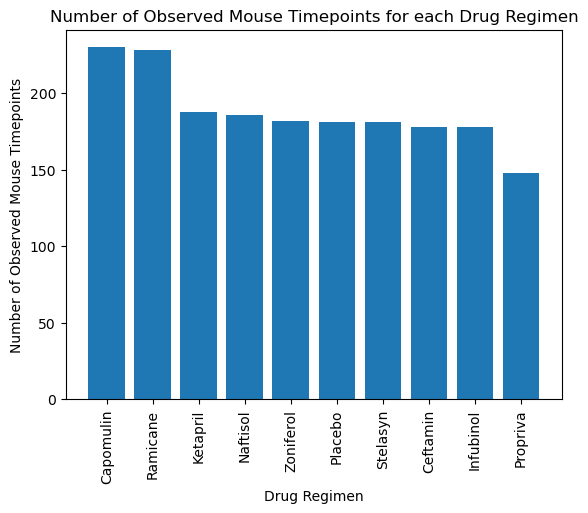

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
summary_df = summary_df.reset_index()

# Sort the DataFrame by the count column in descending order
summary_df = summary_df.sort_values(by=("Tumor Volume (mm3)", "count"), ascending=False)

plt.bar(summary_df["Drug Regimen"], summary_df[("Tumor Volume (mm3)", "count")])

plt.xticks(rotation=90)



plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("Number of Observed Mouse Timepoints for each Drug Regimen")

plt.show()

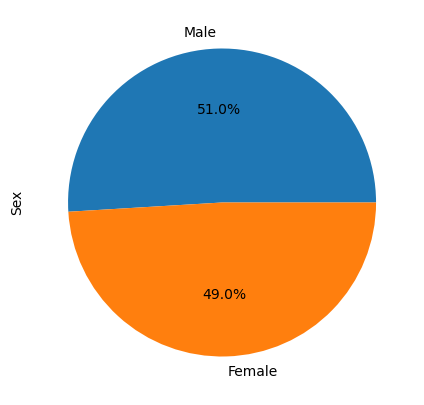

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = data_no_duplicate["Sex"].value_counts()

mouse_gender.plot.pie(y=data_no_duplicate["Sex"].value_counts(), autopct="%1.1f%%", figsize=(5, 5), ylabel = "Sex")
plt.show()

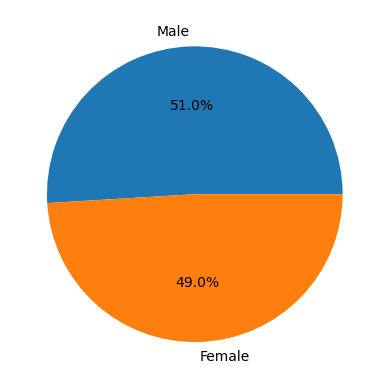

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = data_no_duplicate["Sex"].value_counts()
gender_labels=["Male", "Female"]

plt.pie(mouse_gender, labels=gender_labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


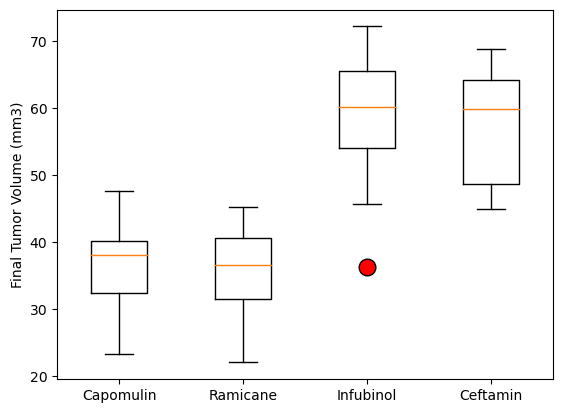

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

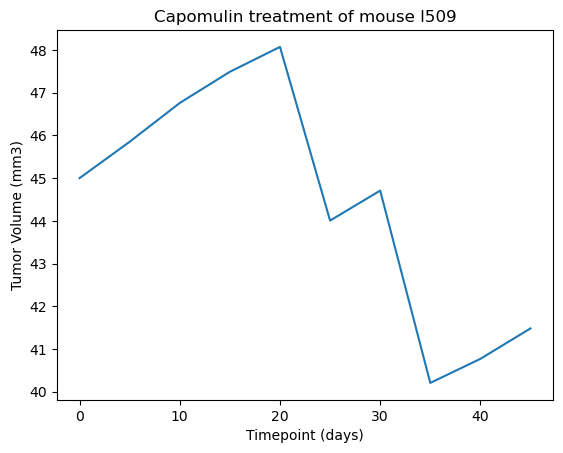

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


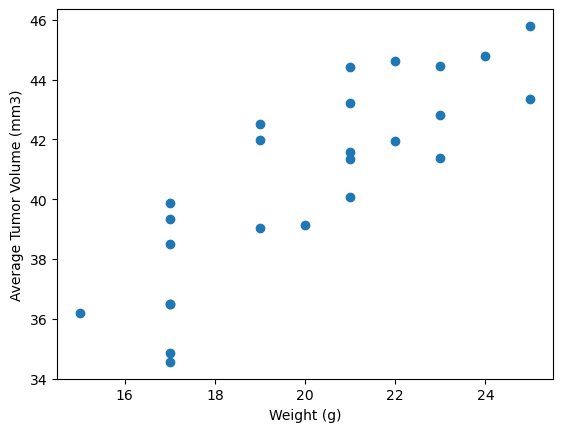

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


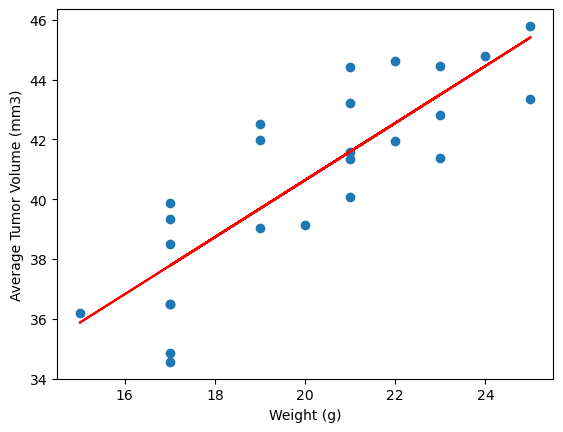

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
